In [1]:
import nltk
nltk.download('senseval')
nltk.download('stopwords')

[nltk_data] Downloading package senseval to /root/nltk_data...
[nltk_data]   Package senseval is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from functools import reduce
from collections import defaultdict

import random
import numpy as np
import pandas as pd

from nltk.corpus import senseval

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
STOPWORDS_SET = set(nltk.corpus.stopwords.words('english'))

In [4]:
line_instances = senseval.instances('line.pos')
hard_instances = senseval.instances('hard.pos')
serve_instances = senseval.instances('serve.pos')
interest_instances = senseval.instances('interest.pos')

In [5]:
def senses(word):
    """
      Arguments:
        - word: target word - string
      Returns:
        - list of possiblle senses of the target word `word` from senseval-2 Corpus
    """
    return list(set(i.senses[0] for i in senseval.instances(word + '.pos')))

Senses (class labels) of the target word *line*:

In [6]:
line_senses = senses('line')
line_senses.sort()
line_senses

['cord', 'division', 'formation', 'phone', 'product', 'text']

Senses (class labels) of the target word *hard*:

In [7]:
hard_senses = senses('hard')
hard_senses.sort()
hard_senses

['HARD1', 'HARD2', 'HARD3']

Senses (class labels) of the target word *serve*:

In [8]:
serve_senses = senses('serve')
serve_senses.sort()
serve_senses

['SERVE10', 'SERVE12', 'SERVE2', 'SERVE6']

Senses (class labels) of the target word *interest*:

In [9]:
interest_senses = senses('interest')
interest_senses.sort()
interest_senses

['interest_1',
 'interest_2',
 'interest_3',
 'interest_4',
 'interest_5',
 'interest_6']

In [10]:
for idx, instance in enumerate(line_instances[:500]):
  if idx % 25 == 0:
    pos = instance.position
    left_context = ' '.join(w for (w,_) in instance.context[pos-7:pos])
    word = instance.context[pos][0]
    right_context = ' '.join(w for (w,_) in instance.context[pos+1:pos+8])
    senses = ' '.join(instance.senses)

    print('%25s | %5s | %25s -> %s' % (left_context, word, right_context, senses))

suggestion that the company install special safety | lines | inside the a-frame structure it was building -> cord
company makes glass-fiber pleasure boats , monofilament | lines |            and antennas . -> cord
carlos turned his back and rebaited his |  line |                         . -> cord
. instead , a series of harp-like | lines | were secured from the top of the -> cord
making short portages and letting down with | lines |                         . -> cord
once he felt a tug on his |  line |                         . -> cord
bait on the hooks dangling from the | lines |    of the fishing poles . -> cord
swing out to the ends of our | lines |    as if we were flying . -> cord
" he cried , reeling in his |  line |                         . -> cord
her wash of many colors on the |  line | a shirt , another shirt , overalls -> cord
" men struggled to position the heavy |  line | ; once more the capstan clanked its -> cord
white pennants and hoisted them on a |  line | fastened to

In [11]:
for idx, instance in enumerate(hard_instances[:500]):
  if idx % 25 == 0:
    pos = instance.position
    left_context = ' '.join(w for (w,_) in instance.context[pos-7:pos])
    word = instance.context[pos][0]
    right_context = ' '.join(w for (w,_) in instance.context[pos+1:pos+8])
    senses = ' '.join(instance.senses)

    print('%25s | %5s | %25s -> %s' % (left_context, word, right_context, senses))

him to defeat him and that 's |  hard |                to do . '' -> HARD1
you run by yourself , it 's |  hard |     to get motivated . '' -> HARD1
are different and the choice is far | harder |                         . -> HARD1
                          |  hard | to rest him , but when you -> HARD1
                          |  hard | to know which psychological complex -- the -> HARD1
                          |  hard |    to get used to , but i -> HARD1
says , `` and that 's really |  hard | to do when you 're on your -> HARD1
                        a |  hard |                   match . -> HARD1
                          |  hard | to build consistency when players come and -> HARD1
                          |  hard | to feel sorry for brown and his -> HARD1
backup performer , that makes it doubly |  hard |          to choose them . -> HARD1
                          |  hard | , because they ask me to do -> HARD1
steps companies are taking to deal with | harder |          economic t

In [12]:
for idx, instance in enumerate(serve_instances[:500]):
  if idx % 25 == 0:
    pos = instance.position
    left_context = ' '.join(w for (w,_) in instance.context[pos-7:pos])
    word = instance.context[pos][0]
    right_context = ' '.join(w for (w,_) in instance.context[pos+1:pos+8])
    senses = ' '.join(instance.senses)

    print('%25s | %5s | %25s -> %s' % (left_context, word, right_context, senses))

sweet fruit , it seems wiser to | serve | it plain with a good sharp cheese -> SERVE10
top with slices of the meat . | serve | with boiled potatoes steamed dry , hot -> SERVE10
my carriage and horses . don 't | serve | the dinner till seven o 'clock . -> SERVE10
minutes . remove from the oven and | serve |              piping hot . -> SERVE10
eaten at the start are quite correctly | served |      in their open tins . -> SERVE10
browned potatoes and yorkshire pudding you might | serve |         rosemary butter . -> SERVE10
tablespoon chopped parsley , and just before | serving | add the 2 chopped hard-boiled eggs . -> SERVE10
. red carpets were spread and champagne | served | underground to visiting notables . -> SERVE10
put back in place . meals were | served | punctually and all the children were expected -> SERVE10
way into a greek 's where they | served | both liquor and ice cream . -> SERVE10
   ( 15 -- 20 minutes ) . | serve | wrapped in a napkin to retain heat -> SERVE10
for larg

In [13]:
for idx, instance in enumerate(interest_instances[:500]):
  if idx % 25 == 0:
    pos = instance.position
    left_context = ' '.join(w for (w,_) in instance.context[pos-7:pos])
    word = instance.context[pos][0]
    right_context = ' '.join(w for (w,_) in instance.context[pos+1:pos+8])
    senses = ' '.join(instance.senses)

    print('%25s | %5s | %25s -> %s' % (left_context, word, right_context, senses))

that portfolio managers expect further declines in | interest |                   rates . -> interest_6
   . : `` we have a great | interest | in making investments , particularly in new -> interest_1
its common stock to the mcalpine family | interests |    , for $ 1 million , or -> interest_5
the judge 's loan , lowered its | interest | rate and accepted a trade-in that had -> interest_6
totally different '' from problems in the | interest |       rate options unit . -> interest_6
just days before the federal reserve raised | interest | rates , ibm offered $ 1 billion -> interest_6
                          | interest | that nyu is host to the first -> interest_1
cray research will retain a 10 % | interest | in the new company , which will -> interest_5
emphasizing financial flows in response to high | interest |                   rates . -> interest_6
it would not be in the best | interest | of cbs news to comment on a -> interest_4
, apparently stems from japanese investors ' | inte

## Naive Bayes Classifier

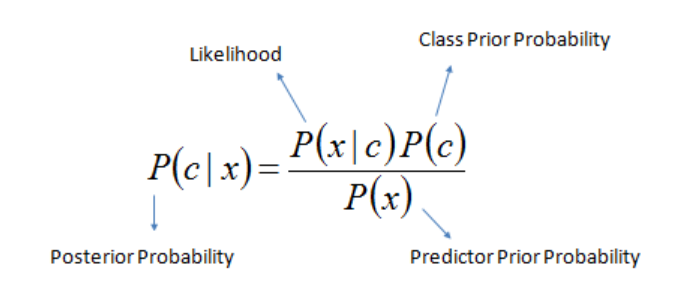

**1. Training**

According to the Naive Bayes classifier assumption, each attribute of a feature vector will be treated as an independent attribute in order to determine the likelihood that the feature vector X belongs to class c.

$$ P(c|X) = P(c) \prod_{i=1}^{I} {P(x_i|c)} \hspace{4mm} | \hspace{1mm} _\text{apply logarithm} \hspace{1mm} \Leftrightarrow $$ 
$$ log(P(c|X)) \simeq log(P(c)) + \sum_{i=1}^{I} log(P(x_i|c)) $$

To apply the Naive Bayes rule we need:


1.   the probability that an example is in class c
$$ P(c) = \frac{\text{number of examples in class `c`}}{\text{total number of examples}} $$
2.   the probability of having attribute x in class c
$$ P(X|c) = \frac{\text{the number of examples in class `c` that are equal to `X`}}{\text{number of examples in class `c`}}$$



**2. Predicting labels based on the learned classifier**
$$ P(c|X) = P(c) \times \prod_{i=1}^{I} {P(x_i | c)} \hspace{1mm}, $$

$\hspace{4mm}$ where $ X = \{x_1, x_2, ..., x_n\} $ with $x_1, \dots, x_n$ independent attributes.

The probability that example $X$ is in class $c$, is obtained by multiplying (or adding logarithms) the individual probabilities of its attributes conditioned by class $c$. For each class $c$, we'll calculate $P(c | X)$, and the assigned label will be determined by class with the highest probability.

## Naive Bayes Classifier for Word Sense Disambiguation

*Notations:*

*   $ alphas \stackrel{\text{not}}{=} P (s_k) = \frac{|\text{occurences of sense } s_k \text{ in corpus } \mathcal{C}|}{|\text{occurences of } w \text{ in corpus } \mathcal{C}|} , \hspace{1mm} \text{ for } k=\overline{1, K}$,

$\hspace{6mm}$ where $K$ is the number of ambiguous senses in the corpus; $s_k$ is the sense of class $k$.
*   $ thetas \stackrel{\text{not}}{=} P(v_j|s_k) , \hspace{1mm} \text{ for } k=\overline{1, K}, j =\overline{1, J}$,

$\hspace{6mm}$ where $J$ is the number of feature vectors $v$.


Based on the frequency of words in the training data, we may estimate the likelihood of different senses of words occurring in a given context.

This notebook contains statistics and results of all experiments for all four target words ("line", "hard", "serve", "interest"). Experiments include different feature extraction techniques (word frequency, surrounding context of target word, pos_tags of words surrounding target word).

In [14]:
def sense_instances(instances, sense):
  """
    Returns the list of instances in `instances` that have the sense `sense`
  """
  return [instance for instance in instances if instance.senses[0] == sense]

Class distribution for word *line*:

In [15]:
line_instances_sense = [sense_instances(line_instances, sense) for sense in line_senses] # `line.pos` instances group by senses

In [16]:
num_samples_per_class_line = [len(instances_group) for instances_group in line_instances_sense]
num_samples_per_class_line

[373, 374, 349, 429, 2217, 404]

In [17]:
df_num_line = pd.DataFrame({'label': line_senses, 'num_samples': num_samples_per_class_line})

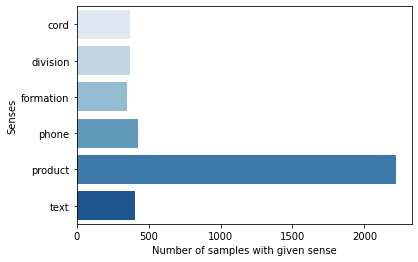

In [18]:
ax = sns.barplot(x='num_samples', y='label', data=df_num_line,
                 palette = "Blues",
                 orient="h")
ax.set(xlabel='Number of samples with given sense', ylabel='Senses')

plt.show()

Class distribution for word *hard*:

In [19]:
hard_instances_sense = [sense_instances(hard_instances, sense) for sense in hard_senses] # `hard.pos` instances group by senses

In [20]:
num_samples_per_class_hard = [len(instances_group) for instances_group in hard_instances_sense]
num_samples_per_class_hard

[3455, 502, 376]

In [21]:
df_num_hard = pd.DataFrame({'label': hard_senses, 'num_samples': num_samples_per_class_hard})

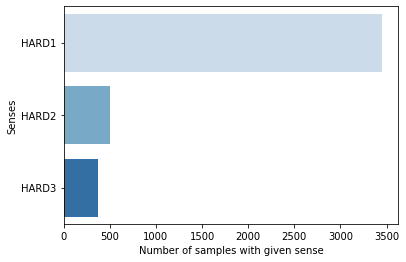

In [22]:
ax = sns.barplot(x='num_samples', y='label', data=df_num_hard,
                 palette = "Blues",
                 orient="h")
ax.set(xlabel='Number of samples with given sense', ylabel='Senses')

plt.show()

Class distribution for word *serve*:

In [23]:
serve_instances_sense = [sense_instances(serve_instances, sense) for sense in serve_senses] # `serve.pos` instances group by senses

In [24]:
num_samples_per_class_serve = [len(instances_group) for instances_group in serve_instances_sense]
num_samples_per_class_serve

[1814, 1272, 853, 439]

In [25]:
df_num_serve = pd.DataFrame({'label': serve_senses, 'num_samples': num_samples_per_class_serve})

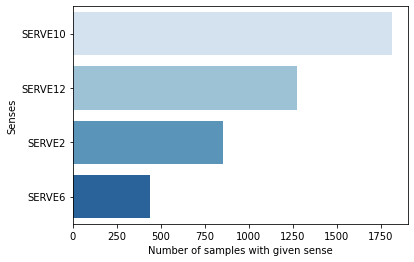

In [26]:
ax = sns.barplot(x='num_samples', y='label', data=df_num_serve,
                 palette = "Blues",
                 orient="h")
ax.set(xlabel='Number of samples with given sense', ylabel='Senses')

plt.show()

Class distribution for word *interest*:

In [27]:
interest_instances_sense = [sense_instances(interest_instances, sense) for sense in interest_senses] # `interest.pos` instances group by senses

In [28]:
num_samples_per_class_interest = [len(instances_group) for instances_group in interest_instances_sense]
num_samples_per_class_interest

[361, 11, 66, 178, 500, 1252]

In [29]:
df_num_interest = pd.DataFrame({'label': interest_senses, 'num_samples': num_samples_per_class_interest})

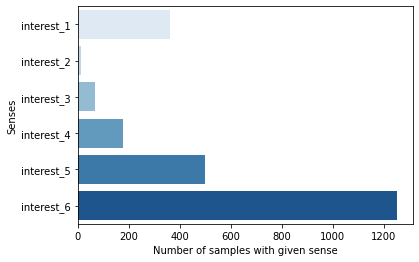

In [30]:
ax = sns.barplot(x='num_samples', y='label', data=df_num_interest,
                 palette = "Blues",
                 orient="h")
ax.set(xlabel='Number of samples with given sense', ylabel='Senses')

plt.show()

In [31]:
def extract_vocab_frequency(instances, stopwords=STOPWORDS_SET, n=300):
  """
    Given a list of senseval instances, return a list of the n most frequent words that appear in its context;
    output is in descending order of frequency and includes also the number of instances in which that key
    appears in the context of instances.
  """
  fd = nltk.FreqDist()
  for instance in instances:
    (target, suffix) = instance.word.split('-')
    words = (context[0] for context in instance.context if not context[0] == target)
    for word in set(words) - stopwords:
      fd[word] += 1

  return fd.most_common()[:n+1]

In [32]:
def extract_vocabulary(instances, stopwords=STOPWORDS_SET, n=300):
  return [w for (w,f) in extract_vocab_frequency(instances, stopwords, n)]

In [33]:
def wsd_word_features(instance, vocabulary):
  features = defaultdict(lambda: False)
  try:
    for (word, pos) in instance.context:
      if word in vocabulary:
        features[word] = True
  except ValueError:
    pass

  return features

In [34]:
def wsd_context_features(instance, dist=3, include_pos=False):
  features = {}
  ind, con = instance.position, instance.context
  for i in range(max(0, ind - dist), ind):
    j = ind - i
    if include_pos:
      features['left-context-word-pos-%s' %j] = con[i]
    else:
      features['left-context-word-%s' %j] = con[i][0]

  for i in range(ind + 1, min(ind + dist + 1, len(con))):
    j = i -  ind
    if include_pos:
      features['right-context-word-pos-%s' %j] = con[i]
    else:
      features['right-context-word-%s' %j] = con[i][0]

  return features

In [35]:
line_vocabulary = extract_vocabulary(line_instances)

In [36]:
wsd_word_features(line_instances[0], line_vocabulary)

defaultdict(<function __main__.wsd_word_features.<locals>.<lambda>>,
            {'"': True,
             "'s": True,
             "'t": True,
             ',': True,
             '.': True,
             'company': True,
             'earlier': True,
             'however': True,
             'lines': True,
             'move': True})

In [37]:
wsd_context_features(instance=line_instances[0], dist=3, include_pos=False)

{'left-context-word-1': 'safety',
 'left-context-word-2': 'special',
 'left-context-word-3': 'install',
 'right-context-word-1': 'inside',
 'right-context-word-2': 'the',
 'right-context-word-3': 'a-frame'}

In [38]:
def count_occurences(feature, instances):
  """
    Count occurences of a feature vector in instances's context
  """

  count = 0
  for instance in instances:
    target_pos = instance.position
    words_instance = [c[0] for i, c in enumerate(instance.context) if i != target_pos]
    count += words_instance.count(feature)
  
  return count

In [39]:
def count_occurences_context(feature, instances):
  count = 0
  for instance in instances:
    target_pos = instance.position
    sk_context = []
    if type(feature) is tuple: # if the feature is composed from a word and its pos_tag
      sk_context = [c for i, c in enumerate(instance.context) if i != target_pos]
    else:
      sk_context = [c[0] for i, c in enumerate(instance.context) if i != target_pos]
    
    count += sk_context.count(feature)

  return count

In [40]:
from nltk.classify import accuracy, NaiveBayesClassifier

In [41]:
def wsd_classifier(train_instances, test_instances, senses, features_type='context', vocabulary_size=300, window_size=3, pos_tag=False,
                   show_parameters_estimation=True, show_confusion_matrix=True, show_samples=True):
  accuracy_test = None

  # Parameters estimation
  instances_sense = [sense_instances(train_instances, sense) for sense in senses] # instances group by senses
  num_samples_per_class = [len(instances_group) for instances_group in instances_sense]
  alphas = np.array([samples_per_class / len(train_instances) for samples_per_class in num_samples_per_class])

  assert np.sum(alphas) == 1.

  if show_parameters_estimation:
    print('\nClass prior probabilities:\n', alphas)

  if features_type == 'frequency':
    # TRAIN
    vocabulary = extract_vocabulary(train_instances, n=vocabulary_size)
    features_train = [wsd_word_features(instance, vocabulary) for instance in train_instances]

    thetas = np.zeros((len(senses), len(vocabulary)))
    instances_sense_train = [sense_instances(train_instances, sense) for sense in senses]
    for k, s_k in enumerate(instances_sense_train):
      for j, v_j in enumerate(vocabulary):
        thetas[k][j] = count_occurences(v_j, s_k)
      thetas[k, :] = thetas[k, :] / np.sum(thetas[k, :])
  
    if show_parameters_estimation:
      print('\nLikelihood:\n', thetas)

    assert np.sum(thetas) == 1. * len(senses) 

    # CLASSIFY
    features_test = [wsd_word_features(instance, vocabulary) for instance in test_instances]
    labels_test =  np.array([instance.senses[0] for instance in test_instances])

    log_probabilities = np.zeros((len(features_test), len(senses)))
    for i, features in enumerate(features_test):
      for j, sense in enumerate(senses):
        log_probabilities[i,j] += np.log(alphas[j]) 
        for feature, _ in features.items():  
          idx = vocabulary.index(feature)
          log_probabilities[i,j] += np.log(thetas[j,idx])

    predicted_labels_indexes = np.argmax(log_probabilities, axis=1)
    predicted_labels = np.array([senses[i] for i in predicted_labels_indexes])
    accuracy_test = np.sum(predicted_labels == labels_test) / len(labels_test)
    print('\nAccuracy: %6.4f' %accuracy_test)
    if show_confusion_matrix:
      cm = confusion_matrix(predicted_labels, labels_test)
      print(cm)

  elif features_type == 'context':
    # TRAIN
    features_train = [wsd_context_features(instance, window_size, include_pos=pos_tag) for instance in train_instances]
    features_values = [list(feature_train.values()) for feature_train in features_train]
    features_values_set = reduce(lambda x, y: x+y, features_values)
    features_values_set = list(set(features_values_set))
    instances_sense_train = [sense_instances(train_instances, sense) for sense in senses]
    
    thetas = np.zeros((len(senses), len(features_values_set)))
    for k, s_k in enumerate(instances_sense_train):
      for j, v_j in enumerate(features_values_set):
        thetas[k, j] = count_occurences_context(v_j, s_k)
      thetas[k, :] = thetas[k, :] / np.sum(thetas[k, :])

    # CLASSIFY
    features_test = [wsd_context_features(instance, window_size) for instance in test_instances]
    features_test = [list(feature_test.values()) for feature_test in features_test]
    labels_test =  np.array([instance.senses[0] for instance in test_instances])

    log_probabilities = np.zeros((len(features_test), len(senses)))
    for i, sample in enumerate(features_test):
      for j, sense in enumerate(senses):
        log_probabilities[i, j] += np.log(alphas[j])
        for feature in sample:
          if feature in features_values_set:
            idx = features_values_set.index(feature)
            log_probabilities[i, j] += np.log(thetas[j, idx])

    predicted_labels_indexes = np.argmax(log_probabilities, axis=1)
    predicted_labels = np.array([senses[i] for i in predicted_labels_indexes])
    accuracy_test = np.sum(predicted_labels == labels_test) / len(labels_test)
    print('\nAccuracy: %6.4f' %accuracy_test)

    if show_confusion_matrix:
      cm = confusion_matrix(predicted_labels, labels_test)
      print(cm)

  if show_samples:
    # Examples of errors
    print()
    wrong_predictions_indexes = np.where(predicted_labels != labels_test)
    for i in wrong_predictions_indexes[0][:5]:
      print(test_instances[i])
  
  return accuracy_test

In [42]:
# Split the instances into a training, validation and test set
train_instances_line, test_instances_line = train_test_split(line_instances, test_size=0.2)
train_instances_line, validation_instances_line = train_test_split(train_instances_line, test_size=0.1)
print('Train set size:', len(train_instances_line))
print('Validation set size:', len(validation_instances_line))
print('Test set size:', len(test_instances_line))

Train set size: 2984
Validation set size: 332
Test set size: 830


In [43]:
wsd_classifier(train_instances_line, validation_instances_line, line_senses, 'frequency', 300, show_samples=True)


Class prior probabilities:
 [0.08780161 0.09316354 0.08210456 0.10522788 0.53786863 0.09383378]

Likelihood:
 [[2.40983607e-01 2.51639344e-01 1.76229508e-02 ... 0.00000000e+00
  0.00000000e+00 4.09836066e-04]
 [2.01296871e-01 1.90019735e-01 3.43952636e-02 ... 0.00000000e+00
  2.81928390e-03 1.40964195e-03]
 [1.91159251e-01 1.95257611e-01 2.98594848e-02 ... 0.00000000e+00
  1.75644028e-03 5.85480094e-04]
 [1.80799691e-01 1.66119374e-01 2.56905544e-02 ... 0.00000000e+00
  1.93162063e-04 1.35213444e-03]
 [1.62566189e-01 1.47584915e-01 3.70980240e-02 ... 1.22691463e-03
  5.16595635e-04 6.45744543e-04]
 [1.84747847e-01 2.00000000e-01 4.05904059e-02 ... 0.00000000e+00
  1.23001230e-03 7.38007380e-04]]

Accuracy: 0.6898
[[ 18   2   1   5   0   2]
 [  2  10   1   0   5   2]
 [  0   4   9   1   4   6]
 [  1   1   7  16   2   4]
 [  3  11   7   6 157   9]
 [  2   6   3   3   3  19]]

SensevalInstance(word='line-n', position=17, context=[('not', 'RB'), ('too', 'RB'), ('young', 'JJ'), (',', ','),

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log


0.6897590361445783

In [44]:
vocabulary_sizes = [i for i in range(100, 600, 100)]

In [45]:
# search for best parameters
best_acc, accuracies = 0, []
best_vocab_size = None
for vocabulary_size in vocabulary_sizes:
  acc = wsd_classifier(train_instances_line, validation_instances_line, line_senses, 'frequency', vocabulary_size, 
                       show_parameters_estimation=False, show_confusion_matrix=False)
  accuracies.append(acc)
  if acc > best_acc:
    best_acc = acc
    best_vocab_size = vocabulary_size                 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.6114

SensevalInstance(word='line-n', position=17, context=[('not', 'RB'), ('too', 'RB'), ('young', 'JJ'), (',', ','), ('i', 'PRP'), ("'d", 'MD'), ('say', 'VB'), ('.', '.'), ('a', 'DT'), ('new', 'JJ'), ('set', 'VBN'), ('of', 'IN'), ('nappies', 'NNS'), ('suddenly', 'RB'), ('appearing', 'VBG'), ('on', 'IN'), ('the', 'DT'), ('line', 'NN'), ('would', 'MD'), ('certainly', 'RB'), ('set', 'VBN'), ('the', 'DT'), ('neighbours', 'NNS'), ('chattering', 'VBG'), ('.', '.')], senses=('cord',))
SensevalInstance(word='line-n', position=71, context=[('consultants', 'NNS'), ('have', 'VBP'), ('said', 'VBD'), ('that', 'IN'), ('it', 'PRP'), ('will', 'MD'), ('take', 'VB'), ('a', 'DT'), ('while', 'NN'), ('for', 'IN'), ('all', 'PDT'), ('the', 'DT'), ('pieces', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('ibm', 'NNP'), ('strategy', 'NN'), ('to', 'TO'), ('fall', 'VB'), ('into', 'IN'), ('place', 'NN'), (',', ','), ('even', 'RB'), ('though', 'IN'), ('the', 'DT'), ('specific', 'JJ'), ('products', 'NNS'), ('

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


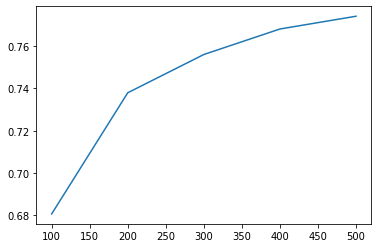

In [47]:
sns.lineplot(vocabulary_sizes, accuracies)

In [48]:
# Test classifier with best value found for vocabulary size
wsd_classifier(train_instances_line, test_instances_line, line_senses, 'frequency', best_vocab_size, 
               show_parameters_estimation=False, show_confusion_matrix=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.7361
[[ 45   5   4   8   2   4]
 [  4  29   4   1   5   5]
 [  5   8  26   5   6  11]
 [  4   5   9  60  10   8]
 [  5  23  15  17 426  15]
 [  5   5   8   6   7  25]]


0.736144578313253

In [ ]:
# Features: surrounding context of a target word
wsd_classifier(train_instances_line, validation_instances_line, line_senses, 'context', window_size=3)


Class prior probabilities:
 [0.09282842 0.08579088 0.0844504  0.10321716 0.53552279 0.09819035]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.7861
[[ 24   5   2   3   2   2]
 [  0  24   2   0   2   2]
 [  0   1  18   2   1   0]
 [  0   0   1  21   4   2]
 [  5   2   2   7 163  12]
 [  6   1   1   2   2  11]]


0.786144578313253

In [ ]:
window_sizes = [i for i in range(1, 15, 2)]

In [ ]:
best_acc, accuracies = 0, []
best_window_size = None
for window_size in window_sizes:
  acc = wsd_classifier(train_instances_line, test_instances_line, line_senses, 'context', window_size=window_size, 
                      show_parameters_estimation=False, show_confusion_matrix=False)
  accuracies.append(acc)
  if acc > best_acc:
    best_acc = acc
    best_window_size = window_size                 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.6904

Accuracy: 0.8000

Accuracy: 0.7783

Accuracy: 0.7253

Accuracy: 0.6892

Accuracy: 0.6554

Accuracy: 0.6133


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


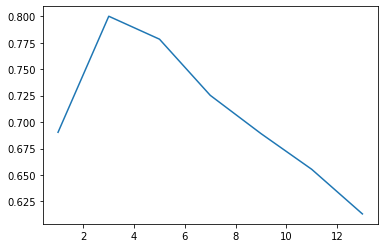

In [ ]:
sns.lineplot(window_sizes, accuracies)

In [ ]:
# Test classifier with best value found for window size
wsd_classifier(train_instances_line, test_instances_line, line_senses, 'context', window_size=best_window_size, 
               show_parameters_estimation=False, show_confusion_matrix=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.8000
[[ 46   5  11  14   6  10]
 [  1  70   0   2   6   2]
 [  0   2  33   1   1   2]
 [  3   0   7  46   0   3]
 [  9   7  18  22 425  21]
 [  2   1   2   1   7  44]]


0.8

In [ ]:
# Features: surrounding context and corresponding pos_tags of a target word
wsd_classifier(train_instances_line, validation_instances_line, line_senses, 'context', window_size=3, pos_tag=True)


Class prior probabilities:
 [0.09282842 0.08579088 0.0844504  0.10321716 0.53552279 0.09819035]

Accuracy: 0.5241
[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [ 35  33  26  35 174  29]
 [  0   0   0   0   0   0]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log


0.5240963855421686

In [ ]:
window_size = [i for i in range(1, 4, 1)]
best_acc, accuracies = 0, []
best_window_size = None
for window_size in window_sizes:
  acc = wsd_classifier(train_instances_line, validation_instances_line, line_senses, 'context', window_size=window_size, pos_tag=True,
                      show_parameters_estimation=False, show_confusion_matrix=False)
  accuracies.append(acc)
  if acc > best_acc:
    best_acc = acc
    best_window_size = window_size                 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.5000

Accuracy: 0.5000

Accuracy: 0.5000

Accuracy: 0.5000

Accuracy: 0.5000

Accuracy: 0.5000

Accuracy: 0.5000


In [ ]:
# Test classifier with best value found for window size
wsd_classifier(train_instances_line, test_instances_line, line_senses, 'context', window_size=best_window_size, pos_tag=True,
               show_parameters_estimation=False, show_confusion_matrix=True)


Accuracy: 0.5289
[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [ 84  69  70  81 439  87]
 [  0   0   0   0   0   0]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log


0.5289156626506024

In [ ]:
# Split the instances into a training, validation and test set
train_instances_hard, test_instances_hard = train_test_split(hard_instances, test_size=0.2)
train_instances_hard, validation_instances_hard = train_test_split(train_instances_hard, test_size=0.1)
print('Train set size:', len(train_instances_hard))
print('Validation set size:', len(validation_instances_hard))
print('Test set size:', len(test_instances_hard))

Train set size: 3119
Validation set size: 347
Test set size: 867


In [ ]:
wsd_classifier(train_instances_hard, validation_instances_hard, hard_senses, 'frequency', 300)


Class prior probabilities:
 [0.79544726 0.119269   0.08528374]

Likelihood:
 [[1.40984971e-01 1.54246191e-01 6.58900619e-02 4.59202247e-02
  2.24140621e-02 2.32461386e-02 2.12699568e-02 1.56014353e-04
  1.09210047e-02 1.18570909e-02 1.19090956e-02 9.46487077e-03
  9.20484685e-03 9.20484685e-03 7.64470331e-03 2.91226793e-03
  7.48868896e-03 6.13656456e-03 6.70861719e-03 7.64470331e-03
  6.55260284e-03 7.28066982e-03 6.76062198e-03 5.72052629e-03
  5.98055021e-03 5.77253107e-03 5.09646888e-03 4.47241146e-03
  5.25248323e-03 4.57642103e-03 1.40412918e-03 2.75625358e-03
  3.90035883e-03 0.00000000e+00 4.88844974e-03 4.21238754e-03
  4.26439232e-03 3.95236362e-03 3.12028707e-03 3.22429664e-03
  3.58833013e-03 3.79634926e-03 3.53632534e-03 3.84835405e-03
  3.32830620e-03 3.17229185e-03 3.32830620e-03 3.58833013e-03
  2.54823444e-03 2.75625358e-03 2.70424879e-03 2.80825836e-03
  2.02818659e-03 2.80825836e-03 2.65224401e-03 2.86026314e-03
  2.80825836e-03 3.01627750e-03 2.49622965e-03 2.86026

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


0.8357348703170029

In [ ]:
best_acc, accuracies = 0, []
best_vocab_size = None
for vocabulary_size in vocabulary_sizes:
  acc = wsd_classifier(train_instances_hard, validation_instances_hard, hard_senses, 'frequency', vocabulary_size, 
                       show_parameters_estimation=False, show_confusion_matrix=False)
  accuracies.append(acc)
  if acc > best_acc:
    best_acc = acc
    best_vocab_size = vocabulary_size                 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.8156

Accuracy: 0.8156

Accuracy: 0.8357

Accuracy: 0.8444

Accuracy: 0.8329


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


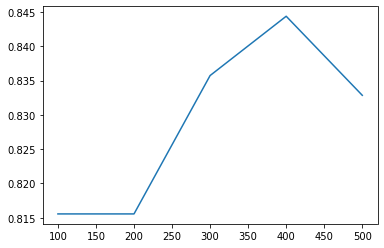

In [ ]:
sns.lineplot(vocabulary_sizes, accuracies)

In [ ]:
# Test classifier with best value found for vocabulary size
wsd_classifier(train_instances_hard, test_instances_hard, hard_senses, 'frequency', best_vocab_size, show_parameters_estimation=False)


Accuracy: 0.8662
[[688  42  54]
 [  8  40   4]
 [  6   2  23]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


0.8662053056516724

In [ ]:
# Features: surrounding context of a target word
wsd_classifier(train_instances_hard, validation_instances_hard, hard_senses, 'context', window_size=3)


Class prior probabilities:
 [0.79544726 0.119269   0.08528374]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.8905
[[265  17  11]
 [  5  27   1]
 [  2   2  17]]


0.8904899135446686

In [ ]:
window_size = [i for i in range(1, 4, 1)]
best_acc, accuracies = 0, []
best_window_size = None
for window_size in window_sizes:
  acc = wsd_classifier(train_instances_hard, validation_instances_hard, hard_senses, 'context', window_size=window_size, pos_tag=True,
                       show_parameters_estimation=False, show_confusion_matrix=False)
  accuracies.append(acc)
  if acc > best_acc:
    best_acc = acc
    best_window_size = window_size                 


Accuracy: 0.7839

Accuracy: 0.7839

Accuracy: 0.7839

Accuracy: 0.7839

Accuracy: 0.7839

Accuracy: 0.7839

Accuracy: 0.7839


In [ ]:
# Test classifier with best value found for window size
wsd_classifier(train_instances_hard, test_instances_hard, hard_senses, 'context', window_size=best_window_size, pos_tag=True,
               show_parameters_estimation=False)


Accuracy: 0.8097
[[702  84  81]
 [  0   0   0]
 [  0   0   0]]


0.8096885813148789

In [ ]:
# Split the instances into a training, validation and test set
train_instances_serve, test_instances_serve = train_test_split(serve_instances, test_size=0.2)
train_instances_serve, validation_instances_serve = train_test_split(train_instances_serve, test_size=0.15)
print('Train set size:', len(train_instances_serve))
print('Validation set size:', len(validation_instances_serve))
print('Test set size:', len(test_instances_serve))

Train set size: 2976
Validation set size: 526
Test set size: 876


In [ ]:
wsd_classifier(train_instances_serve, validation_instances_serve, serve_senses, 'frequency', 300)


Class prior probabilities:
 [0.40625    0.29099462 0.1999328  0.10282258]

Likelihood:
 [[0.20913842 0.15909091 0.00245486 ... 0.00063351 0.00174216 0.00055432]
 [0.20731887 0.19396488 0.00103291 ... 0.00132802 0.00036889 0.00095913]
 [0.20653477 0.2198741  0.00029976 ... 0.00089928 0.00089928 0.00089928]
 [0.19350042 0.20412065 0.00063721 ... 0.00106202 0.         0.00106202]]

Accuracy: 0.7281
[[195   7  22   3]
 [ 15 124  23  13]
 [ 13  16  39   6]
 [  6  11   8  25]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


0.7281368821292775

In [ ]:
vocabulary_sizes = [i for i in range(100, 900, 100)]

best_acc, accuracies = 0, []
best_vocab_size = None
for vocabulary_size in vocabulary_sizes:
  acc = wsd_classifier(train_instances_serve, validation_instances_serve, serve_senses, 'frequency', vocabulary_size, 
                       show_parameters_estimation=False, show_confusion_matrix=False)
  accuracies.append(acc)
  if acc > best_acc:
    best_acc = acc
    best_vocab_size = vocabulary_size                 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.6825

Accuracy: 0.7319

Accuracy: 0.7281

Accuracy: 0.7319

Accuracy: 0.7490

Accuracy: 0.7624

Accuracy: 0.7700

Accuracy: 0.7776


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


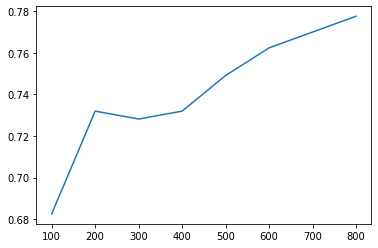

In [ ]:
sns.lineplot(vocabulary_sizes, accuracies)

In [ ]:
# Test classifier with best value found for vocabulary size
wsd_classifier(train_instances_serve, test_instances_serve, serve_senses, 'frequency', best_vocab_size, show_parameters_estimation=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.7957
[[346  13  35  10]
 [  7 206  31  14]
 [ 20  19  93  10]
 [  3  10   7  52]]


0.795662100456621

In [ ]:
# Features: surrounding context of a target word
wsd_classifier(train_instances_serve, validation_instances_serve, serve_senses, 'context', window_size=3, pos_tag=False)


Class prior probabilities:
 [0.40625    0.29099462 0.1999328  0.10282258]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.8460
[[208   5   7   0]
 [  6 136  12   8]
 [ 14  11  73  11]
 [  1   6   0  28]]


0.8460076045627376

In [ ]:
window_size = [i for i in range(1, 6, 1)]
best_acc, accuracies = 0, []
best_window_size = None
for window_size in window_sizes:
  acc = wsd_classifier(train_instances_serve, validation_instances_serve, serve_senses, 'context', window_size=window_size, pos_tag=False,
                       show_parameters_estimation=False, show_confusion_matrix=False)
  accuracies.append(acc)
  if acc > best_acc:
    best_acc = acc
    best_window_size = window_size                 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.6654

Accuracy: 0.8460

Accuracy: 0.8498

Accuracy: 0.8308

Accuracy: 0.8080

Accuracy: 0.7681

Accuracy: 0.7433


In [ ]:
# Test classifier with best value found for window size
wsd_classifier(train_instances_serve, test_instances_serve, serve_senses, 'context', window_size=best_window_size, 
               show_parameters_estimation=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.8630
[[350  10  16   6]
 [ 11 213  13   7]
 [ 13  21 130  10]
 [  2   4   7  63]]


0.863013698630137

In [ ]:
# Features: surrounding context (words and their corresponding pos tags) of a target word
wsd_classifier(train_instances_serve, validation_instances_serve, serve_senses, 'context', window_size=3, pos_tag=True)


Class prior probabilities:
 [0.40625    0.29099462 0.1999328  0.10282258]

Accuracy: 0.4354
[[229 158  92  47]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]


0.435361216730038

In [ ]:
window_size = [i for i in range(1, 3, 1)]
best_acc, accuracies = 0, []
best_window_size = None
for window_size in window_sizes:
  acc = wsd_classifier(train_instances_serve, validation_instances_serve, serve_senses, 'context', window_size=window_size, pos_tag=True,
                       show_parameters_estimation=False, show_confusion_matrix=False)
  accuracies.append(acc)
  if acc > best_acc:
    best_acc = acc
    best_window_size = window_size                 


Accuracy: 0.4354

Accuracy: 0.4354

Accuracy: 0.4354

Accuracy: 0.4354

Accuracy: 0.4354

Accuracy: 0.4354

Accuracy: 0.4354


In [ ]:
# Test classifier with best value found for window size
wsd_classifier(train_instances_serve, test_instances_serve, serve_senses, 'context', window_size=best_window_size, pos_tag=True,
               show_parameters_estimation=False)


Accuracy: 0.4292
[[376 248 166  86]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]


0.4292237442922374

In [ ]:
# Split the instances into a training, validation and test set
train_instances_interest, test_instances_interest = train_test_split(interest_instances, test_size=0.2)
train_instances_interest, validation_instances_interest = train_test_split(train_instances_interest, test_size=0.15)
print('Train set size:', len(train_instances_interest))
print('Validation set size:', len(validation_instances_interest))
print('Test set size:', len(test_instances_interest))

Train set size: 1609
Validation set size: 285
Test set size: 474


In [ ]:
wsd_classifier(train_instances_interest, validation_instances_interest, interest_senses, 'frequency', 300)


Class prior probabilities:
 [0.15102548 0.00559354 0.02672467 0.0770665  0.20820385 0.53138595]

Likelihood:
 [[0.17592161 0.13999067 0.00093327 ... 0.00139991 0.00093327 0.        ]
 [0.15492958 0.15492958 0.         ... 0.         0.         0.        ]
 [0.19951338 0.20924574 0.         ... 0.         0.00243309 0.        ]
 [0.17854002 0.16007036 0.00087951 ... 0.         0.00087951 0.        ]
 [0.16991643 0.16333249 0.         ... 0.00025323 0.00202583 0.00025323]
 [0.1312767  0.10659706 0.04337921 ... 0.00113906 0.00047461 0.00151875]]

Accuracy: 0.8070
[[ 20   0   0   2   5   4]
 [  0   0   0   0   0   0]
 [  0   0   1   0   3   0]
 [  8   0   3  14   3   0]
 [  1   0   2   3  51   3]
 [ 13   1   0   1   3 144]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


0.8070175438596491

In [ ]:
vocabulary_sizes = [i for i in range(100, 900, 100)]

best_acc, accuracies = 0, []
best_vocab_size = None
for vocabulary_size in vocabulary_sizes:
  acc = wsd_classifier(train_instances_interest, validation_instances_interest, interest_senses, 'frequency', vocabulary_size, 
                       show_parameters_estimation=False, show_confusion_matrix=False)
  accuracies.append(acc)
  if acc > best_acc:
    best_acc = acc
    best_vocab_size = vocabulary_size                 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.7579

Accuracy: 0.7965

Accuracy: 0.8070

Accuracy: 0.7895

Accuracy: 0.7895

Accuracy: 0.7684

Accuracy: 0.7439

Accuracy: 0.7368


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


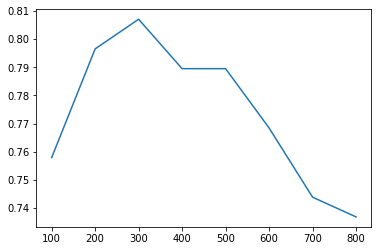

In [ ]:
sns.lineplot(vocabulary_sizes, accuracies)

In [ ]:
# Test classifier with best value found for vocabulary size
wsd_classifier(train_instances_interest, test_instances_interest, interest_senses, 'frequency', best_vocab_size, show_parameters_estimation=False)


Accuracy: 0.7890
[[ 45   0   2   8  10   2]
 [  0   0   0   0   0   0]
 [  1   0   5   0   1   0]
 [  7   0   6  22  10   4]
 [  6   1   4   4  71   9]
 [ 17   0   0   0   8 231]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


0.7890295358649789

In [ ]:
# Features: surrounding context of a target word
wsd_classifier(train_instances_interest, validation_instances_interest, interest_senses, 'context', window_size=3, pos_tag=False)


Class prior probabilities:
 [0.15102548 0.00559354 0.02672467 0.0770665  0.20820385 0.53138595]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.8211
[[ 27   0   0   2   2   5]
 [  0   1   0   0   0   0]
 [  0   0   3   0   1   0]
 [  2   0   1  13   2   3]
 [  4   0   1   1  54   7]
 [  9   0   1   4   6 136]]


0.8210526315789474

In [ ]:
window_size = [i for i in range(1, 6, 1)]
best_acc, accuracies = 0, []
best_window_size = None
for window_size in window_sizes:
  acc = wsd_classifier(train_instances_interest, validation_instances_interest, interest_senses, 'context', window_size=window_size, pos_tag=False,
                       show_parameters_estimation=False, show_confusion_matrix=False)
  accuracies.append(acc)
  if acc > best_acc:
    best_acc = acc
    best_window_size = window_size                 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.7684

Accuracy: 0.8211

Accuracy: 0.7825

Accuracy: 0.7263

Accuracy: 0.6807

Accuracy: 0.6281

Accuracy: 0.6175


In [ ]:
# Test classifier with best value found for window size
wsd_classifier(train_instances_interest, test_instances_interest, interest_senses, 'context', window_size=best_window_size, 
               show_parameters_estimation=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.8165
[[ 45   1   1   6  10   4]
 [  1   0   0   0   0   0]
 [  1   0   6   0   0   0]
 [  6   0   2  20   5   0]
 [  4   0   3   3  76   2]
 [ 19   0   5   5   9 240]]


0.8164556962025317

In [ ]:
# Features: surrounding context (words and their corresponding pos_tags) of a target word
wsd_classifier(train_instances_interest, validation_instances_interest, interest_senses, 'context', window_size=3, pos_tag=False)


Class prior probabilities:
 [0.15102548 0.00559354 0.02672467 0.0770665  0.20820385 0.53138595]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log



Accuracy: 0.8211
[[ 27   0   0   2   2   5]
 [  0   1   0   0   0   0]
 [  0   0   3   0   1   0]
 [  2   0   1  13   2   3]
 [  4   0   1   1  54   7]
 [  9   0   1   4   6 136]]


0.8210526315789474

In [ ]:
window_size = [i for i in range(1, 4, 1)]
best_acc, accuracies = 0, []
best_window_size = None
for window_size in window_sizes:
  acc = wsd_classifier(train_instances_interest, validation_instances_interest, interest_senses, 'context', window_size=window_size, pos_tag=True,
                       show_parameters_estimation=False, show_confusion_matrix=False)
  accuracies.append(acc)
  if acc > best_acc:
    best_acc = acc
    best_window_size = window_size                 


Accuracy: 0.5298

Accuracy: 0.5298

Accuracy: 0.5298

Accuracy: 0.5298

Accuracy: 0.5298

Accuracy: 0.5298

Accuracy: 0.5298


In [ ]:
# Test classifier with best value found for window size
wsd_classifier(train_instances_interest, test_instances_interest, interest_senses, 'context', window_size=best_window_size, pos_tag=True,
               show_parameters_estimation=False)


Accuracy: 0.5190
[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [ 76   1  17  34 100 246]]


0.5189873417721519

In our case, including the pos_tags of words surrounding the target word did not lead to better results.